# 6.1 Quantification of calibration accuracy
- 


In [1]:
import os 
import pandas as pd
import numpy as np
from scipy import ndimage
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_center=pd.read_csv('TV1_center_000.csv', on_bad_lines='skip')
data_center_1=data_center.loc[:,['Tx.1','Ty.1','Tz.1']]
data_center_2=data_center.loc[:,['Tx.2','Ty.2','Tz.2']]

data=pd.read_table('TV1_002.tsv', on_bad_lines='skip')
data_1=data.loc[:,['Tx.3','Ty.3','Tz.3']]
data_2=data.loc[:,['Tx.4','Ty.4','Tz.4']]
#print(data['Error.4'])

In [3]:
data_center_3=pd.DataFrame(columns=['x','y','z'])
for i in range(len(data_center_1)):
    data_center_3=pd.concat([data_center_3, pd.DataFrame.from_records([{'x': (data_center_1.iloc[i]['Tx.1']-data_center_2.iloc[i]['Tx.2']),
                                                         'y': (data_center_1.iloc[i]['Ty.1']-data_center_2.iloc[i]['Ty.2']),
                                                         'z': (data_center_1.iloc[i]['Tz.1']-data_center_2.iloc[i]['Tz.2'])
                                                         }])])
data_center_3=data_center_3.reset_index(drop=True)

data_3=pd.DataFrame(columns=['x','y','z'])
for i in range(len(data_1)):
    data_3=pd.concat([data_3, pd.DataFrame.from_records([{'x': (data_1.iloc[i]['Tx.3']-data_2.iloc[i]['Tx.4']),
                                                         'y': (data_1.iloc[i]['Ty.3']-data_2.iloc[i]['Ty.4']),
                                                         'z': (data_1.iloc[i]['Tz.3']-data_2.iloc[i]['Tz.4'])
                                                         }])])
data_3=data_3.reset_index(drop=True)


In [4]:
def norm(row):
    row.norm=np.sqrt(row.x**2+row.y**2+row.z**2)
    return row

data_center_3['norm']=np.nan
data_center_3=data_center_3.apply(norm,axis='columns')

data_3['norm']=np.nan
data_3=data_3.apply(norm,axis='columns')
print('mean of the distance between markers from the data taken in the center of the field :',data_center_3.norm.mean())
print('mean of the distance between markers from the data taken close to the border :',data_3.norm.mean())

mean of the distance between markers from the data taken in the center of the field : 88.80369839572633
mean of the distance between markers from the data taken close to the border : 88.75229028943991


In [5]:
def std(row):
    row.dev=(row.norm-m)**2
    return row

data_center_3['dev']=np.nan
m=data_center_3.norm.mean()
data_center_3=data_center_3.apply(std,axis='columns')

data_3['dev']=np.nan
m=data_3.norm.mean()
data_3=data_3.apply(std,axis='columns')

print('the standard deviation of the distance between markers from the data taken in the center of the field :',np.sqrt(data_center_3.dev.sum()/(len(data_center_3)-1)))
print('the standard deviation of the distance between markers from the data taken close to the border :',np.sqrt(data_3.dev.sum()/(len(data_3)-1)))

the standard deviation of the distance between markers from the data taken in the center of the field : 0.13953269496678317
the standard deviation of the distance between markers from the data taken close to the border : 0.06533662575595464


In [6]:
print('95th percentile of distance between markers from the data taken in the center of the field :',np.percentile(data_center_3['norm'].to_numpy(),95))
print('95th percentile of distance between markers from the data taken close to the border :',np.percentile(data_3['norm'].to_numpy(),95))

95th percentile of distance between markers from the data taken in the center of the field : 89.00789816204353
95th percentile of distance between markers from the data taken close to the border : 88.85925564259087


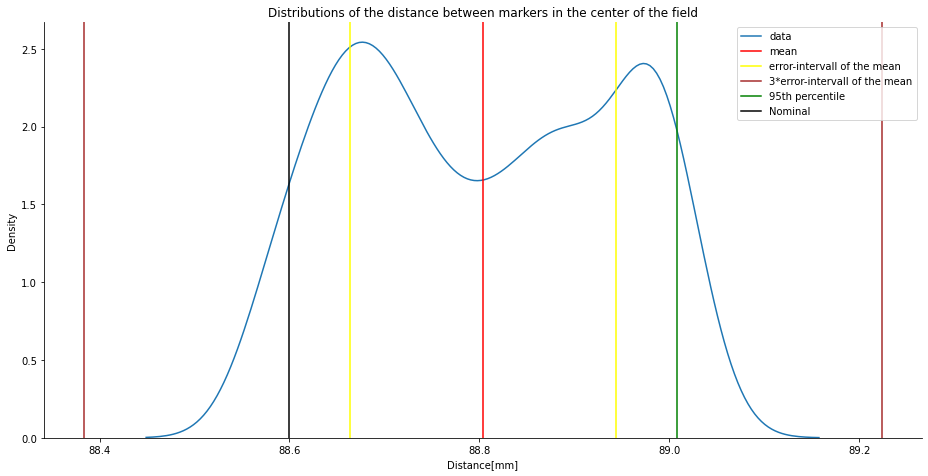

<Figure size 432x288 with 0 Axes>

In [7]:
sns.displot(data_center_3, x="norm",kind="kde",label='data',height=6.5,aspect=2)
plt.axvline(np.mean(data_center_3['norm']), color='red',label='mean')
plt.axvline(np.mean(data_center_3['norm'])+0.14, color='yellow',label='error-intervall of the mean')
plt.axvline(np.mean(data_center_3['norm'])-0.14, color='yellow')
plt.axvline(np.mean(data_center_3['norm'])+3*0.14, color='brown',label='3*error-intervall of the mean')
plt.axvline(np.mean(data_center_3['norm'])-3*0.14, color='brown')
plt.axvline(np.percentile(data_center_3['norm'].to_numpy(),95), color='green',label='95th percentile')
plt.axvline(88.60, color='black',label='Nominal')
plt.title('Distributions of the distance between markers in the center of the field')
plt.xlabel('Distance[mm]')
plt.legend()
plt.show()
plt.savefig('Dist_C')

In [8]:
len(data_center_3),len(data_3)

(616, 607)

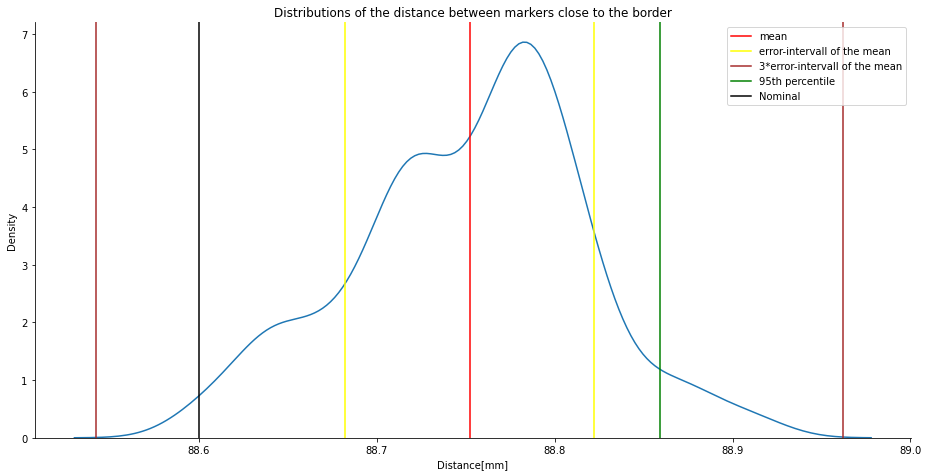

<Figure size 432x288 with 0 Axes>

In [9]:
sns.displot(data_3, x="norm",kind="kde",height=6.5,aspect=2)
plt.axvline(np.mean(data_3['norm']), color='red',label='mean')
plt.axvline(np.mean(data_3['norm'])+0.07, color='yellow',label='error-intervall of the mean')
plt.axvline(np.mean(data_3['norm'])-0.07, color='yellow')
plt.axvline(np.mean(data_3['norm'])+3*0.07, color='brown',label='3*error-intervall of the mean')
plt.axvline(np.mean(data_3['norm'])-3*0.07, color='brown')
plt.axvline(np.percentile(data_3['norm'].to_numpy(),95), color='green',label='95th percentile')
plt.axvline(88.60, color='black',label='Nominal')
plt.title('Distributions of the distance between markers close to the border')
plt.xlabel('Distance[mm]')
plt.legend()
plt.show()
plt.savefig('Dist_B')

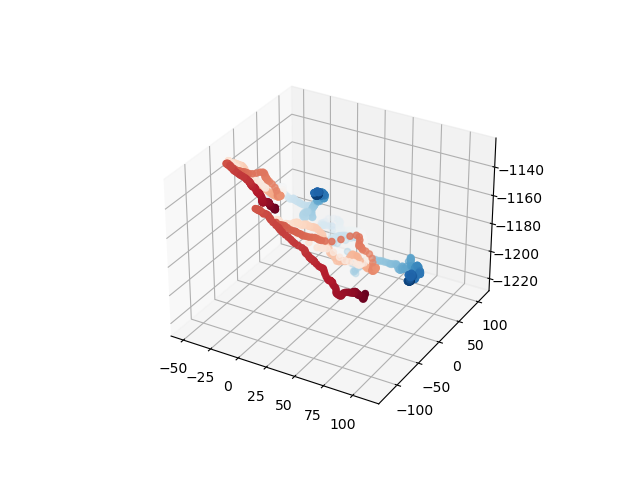

In [16]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
f='RdBu'
ax.scatter3D(data_center_1.iloc[:]['Tx.1'], data_center_1.iloc[:]['Ty.1'],data_center_1.iloc[:]['Tz.1'],c=data_center_1.index,cmap=f);
ax.scatter3D(data_center_2.iloc[:]['Tx.2'], data_center_2.iloc[:]['Ty.2'],data_center_2.iloc[:]['Tz.2'],c=data_center_1.index,cmap=f);



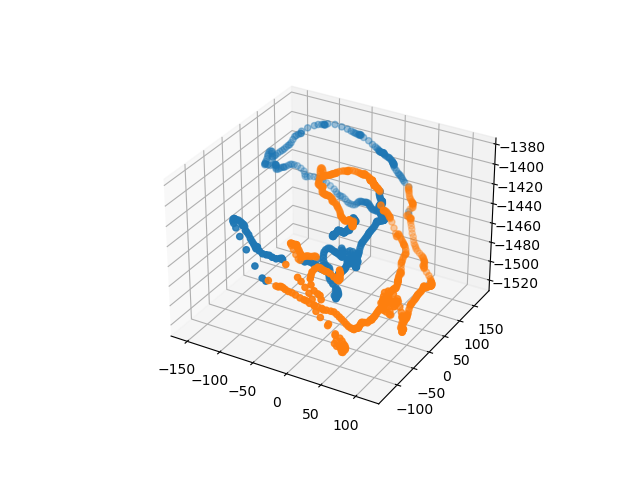

In [11]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(data_1.iloc[:]['Tx.3'], data_1.iloc[:]['Ty.3'],data_1.iloc[:]['Tz.3']);
ax.scatter3D(data_2.iloc[:]['Tx.4'], data_2.iloc[:]['Ty.4'],data_2.iloc[:]['Tz.4']);
